In [27]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths defined in paths module:
 paths.data_root: /Users/trafferty/data
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.images_root: /Users/trafferty/data/images
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.dat_root: /Users/trafferty/data/dat
 paths.tmp_dir: /Users/trafferty/tmp
 paths.ws_dir: /Users/trafferty/workspace
 paths.mii_home: /Users/trafferty/dev
 paths.inhouse: /Users/trafferty/dev/src/inhouse


#### After imgAPO refactor, needed to test to see if SMT Edge Circles and Binary Delta algos still worked the same

In [2]:
binary_delta_before_path = f"{paths.tmp_dir}/MR_Spreadcam/imgAPO_2019_11_09-11_20_24__00204331_0926-T32-Priming-trimmed__BinaryDelta.dat"
binary_delta_after_path = f"{paths.tmp_dir}/MR_Spreadcam/imgAPO_2019_12_09-11_13_37__NEW__BinaryDelta.dat"
edge_circle_before_path = f"{paths.tmp_dir}/MR_Spreadcam/imgAPO_2019_11_09-11_17_09__00204331_0926-T32-Priming-trimmed__EdgeCircle.dat"
edge_circle_after_path = f"{paths.tmp_dir}/MR_Spreadcam/imgAPO_2019_12_09-11_16_30__NEW_EdgeCircle.dat"


In [5]:
def read_file(file_path):
    with open(binary_delta_before_path, 'r') as filehandle:
        lines = []
        filecontents = filehandle.readlines()

        for line in filecontents:
            # remove linebreak which is the last character of the string
            lines.append(line[:-1])
        return lines

In [36]:
binary_delta_before_data = read_file(binary_delta_before_path)
binary_delta_after_data = read_file(binary_delta_after_path)

In [37]:
edge_circle_before_data = read_file(edge_circle_before_path)
edge_circle_after_data  = read_file(edge_circle_after_path)

In [38]:
binary_delta_area_deltas = []
binary_delta_cp_x_deltas = []
binary_delta_cp_y_deltas = []
edge_circle_area_deltas = []
edge_circle_cp_x_deltas = []
edge_circle_cp_y_deltas = []

for binary_delta_before_data, binary_delta_after_data in zip(binary_delta_before_data, binary_delta_after_data):
    binary_delta_before_area, binary_delta_before_cp_x, binary_delta_before_cp_y = map(float, binary_delta_before_data.split(','))
    binary_delta_after_area, binary_delta_after_cp_x, binary_delta_after_cp_y = map(float, binary_delta_after_data.split(','))
    binary_delta_area_deltas.append(binary_delta_before_area - binary_delta_after_area)
    binary_delta_cp_x_deltas.append(binary_delta_before_cp_x - binary_delta_after_cp_x)
    binary_delta_cp_y_deltas.append(binary_delta_before_cp_y - binary_delta_after_cp_y)

for edge_circle_before_data, edge_circle_after_data in zip(edge_circle_before_data, edge_circle_after_data):
    edge_circle_before_area, edge_circle_before_cp_x, edge_circle_before_cp_y = map(float, edge_circle_before_data.split(','))
    edge_circle_after_area,  edge_circle_after_cp_x,  edge_circle_after_cp_y = map(float,  edge_circle_after_data.split(','))
    edge_circle_area_deltas.append(edge_circle_before_area - edge_circle_after_area)
    edge_circle_cp_x_deltas.append(edge_circle_before_cp_x - edge_circle_after_cp_x)
    edge_circle_cp_y_deltas.append(edge_circle_before_cp_y - edge_circle_after_cp_y)

In [32]:
max(cp_y_deltas)

0.0

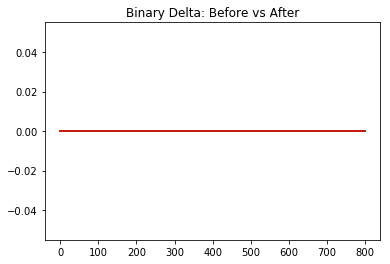

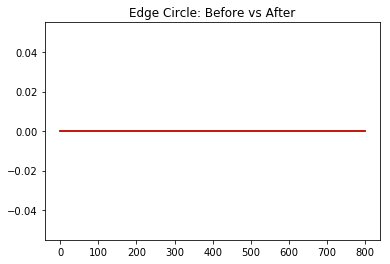

In [39]:
color = ('b','g','r')
plt.plot(binary_delta_area_deltas, color = color[0])
plt.plot(binary_delta_cp_x_deltas, color = color[1])
plt.plot(binary_delta_cp_y_deltas, color = color[2])
plt.title('Binary Delta: Before vs After')
plt.show()

color = ('b','g','r')
plt.plot(edge_circle_area_deltas, color = color[0])
plt.plot(edge_circle_cp_x_deltas, color = color[1])
plt.plot(edge_circle_cp_y_deltas, color = color[2])
plt.title('Edge Circle: Before vs After')
plt.show()
